In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import load_dataset

import warnings
warnings.filterwarnings('ignore')

In [ ]:

#Load the DataSet
tanic = sns.load_dataset('titanic')

#Convert to a DataFrame
titanic = pd.DataFrame(tanic)

# Explore the dataset's structure

In [ ]:
#First Six Rows
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
#Column Types
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
#Summary Stats
statistical_summary = titanic.describe()

# # Display results
print("Statistical Summary:\n", statistical_summary)

Statistical Summary:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
# Check for missing values

missing = titanic.isnull().sum()

print("Missing values in each column:")
print (missing)

Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Deck column has the most missing values
titanic['deck'].value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
#So it will be dropped
titanic1 = titanic.drop('deck', axis=1)
print(titanic1.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


In [ ]:
#Find Duplicates

duplicate_rows = titanic1.duplicated()
print("Dup1icate rows: ")
print(duplicate_rows)



Dup1icate rows: 
0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


In [ ]:

# Remove duplicate rows
titanic2 = titanic1.drop_duplicates( )
print("DataFrame after removing duplicates: ")
print(titanic2)

DataFrame after removing duplicates: 
     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female   NaN      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male  e


*   Deck has disproportionately null values so it has been removed

*   The age column will be scaled after null values are either removed, interpolated, or filled in with the mean

* The isnull & empty rows within embarked, alive and alone columns will be inspected to see if other entries within them will affect the model



In [ ]:
# Inspection as claimed above

print(titanic2.isnull().any(axis=0))

titanic2_nan_rows = titanic2.loc[titanic2.isnull().any(axis=1)]
print(titanic2_nan_rows)

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
embark_town     True
alive          False
alone          False
dtype: bool
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
5           0       3    male   NaN      0      0   8.4583        Q   Third   
17          1       2    male   NaN      0      0  13.0000        S  Second   
19          1       3  female   NaN      0      0   7.2250        C   Third   
26          0       3    male   NaN      0      0   7.2250        C   Third   
28          1       3  female   NaN      0      0   7.8792        Q   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
829         1       1  female  62.0      0      0  80.0000      NaN   First   
839         1       1    male   NaN      0      0  29.7000    

In [ ]:
print(titanic2.isnull().any(axis=0).sum())

3


# **Exploratory Data Analysis**

## **Exploratory Visualizations**

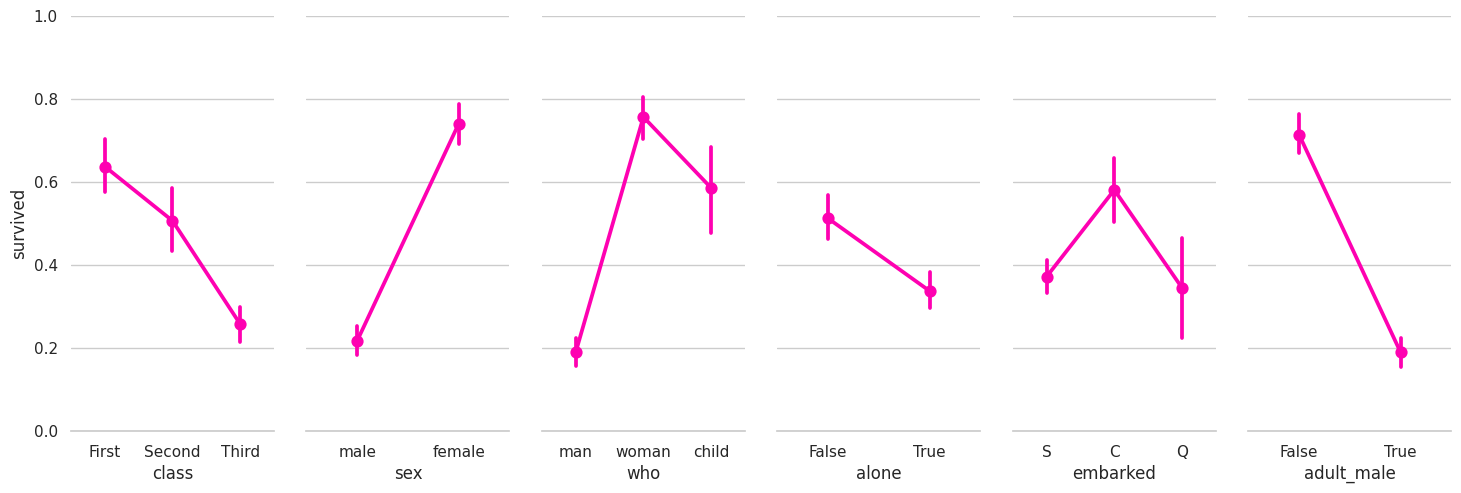

In [ ]:
#Aim: To See What is Statistically Significant as a Glance

sns.set_theme(style="whitegrid")


# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic2, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone", "embarked", "adult_male"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color="xkcd:bright pink")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

Based on the above: <br>
Survival increases with higher class <br>
Women were more likely to survive the Titanic <br>
Adult men were far less likely to survive


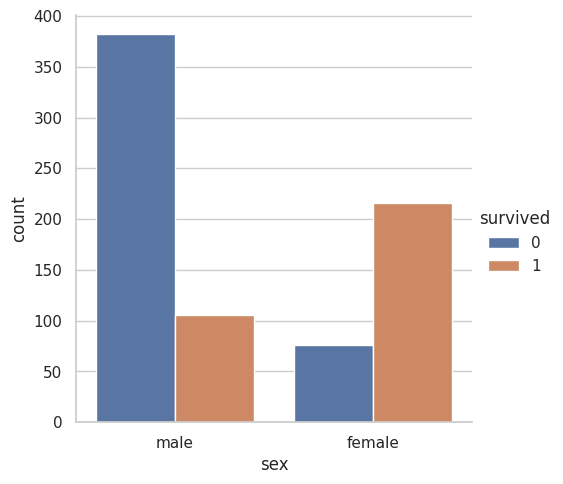

In [ ]:
#Plotting Sex Against Survival Status
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = titanic2)

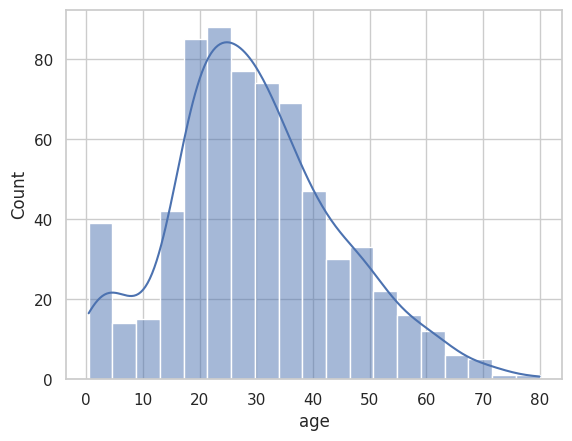

In [ ]:
#Age Distribution:
sns.histplot(titanic2.age, kde=True)
plt.show()

<Axes: xlabel='survived', ylabel='fare'>

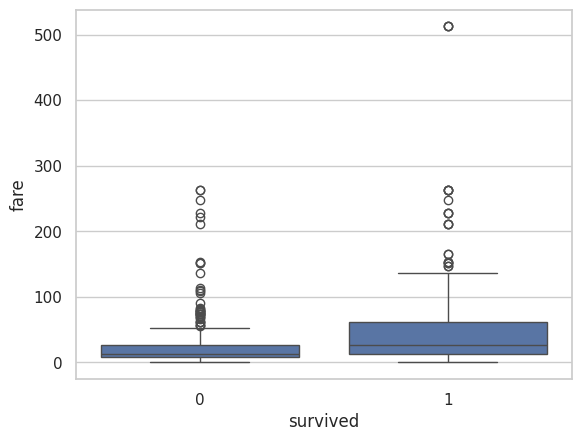

In [ ]:
#Fare Boxplot
sns.boxplot(x='survived', y = 'fare', data=titanic2)

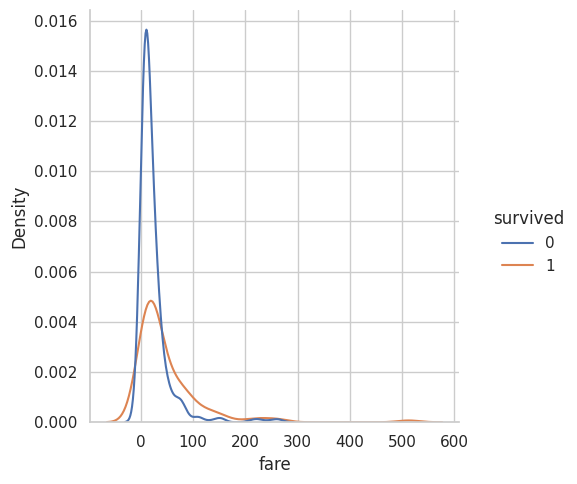

In [ ]:
# Survival based on Fare:
sns.displot(data=titanic2, x="fare",hue='survived',kind ='kde')

Text(0.5, 1.0, 'Fare over Pclass')

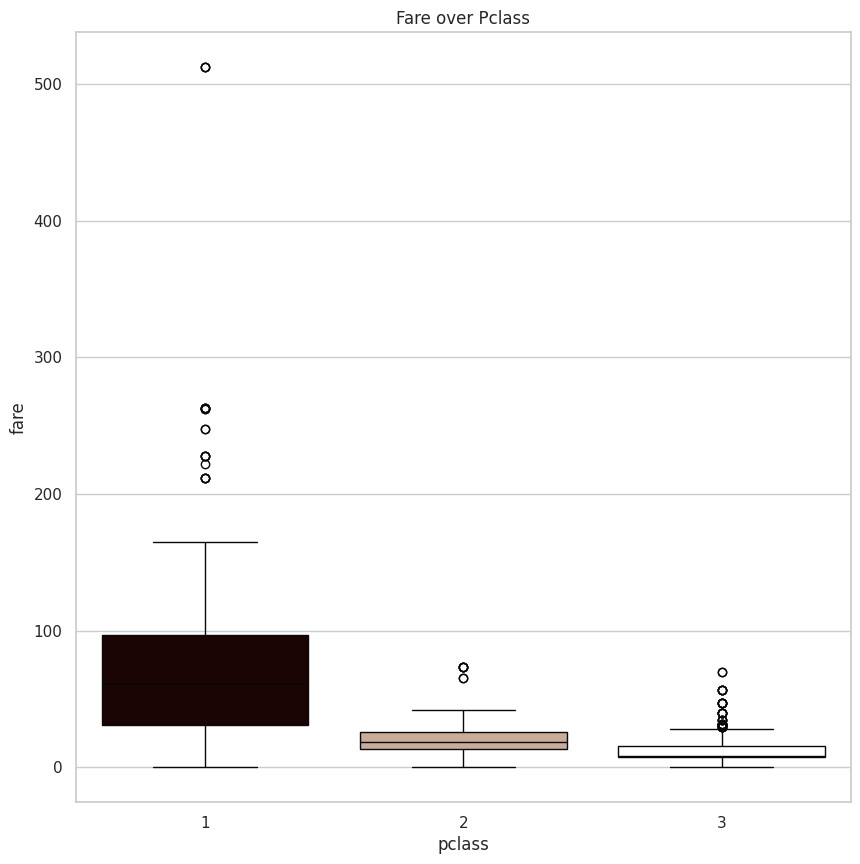

In [ ]:
# Fare vs Pclass

plt.figure(figsize=(10, 10))
sns.boxplot(x='pclass',y='fare',data=titanic2, hue = 'pclass', legend = False, palette='pink')
plt.title('Fare over Pclass')

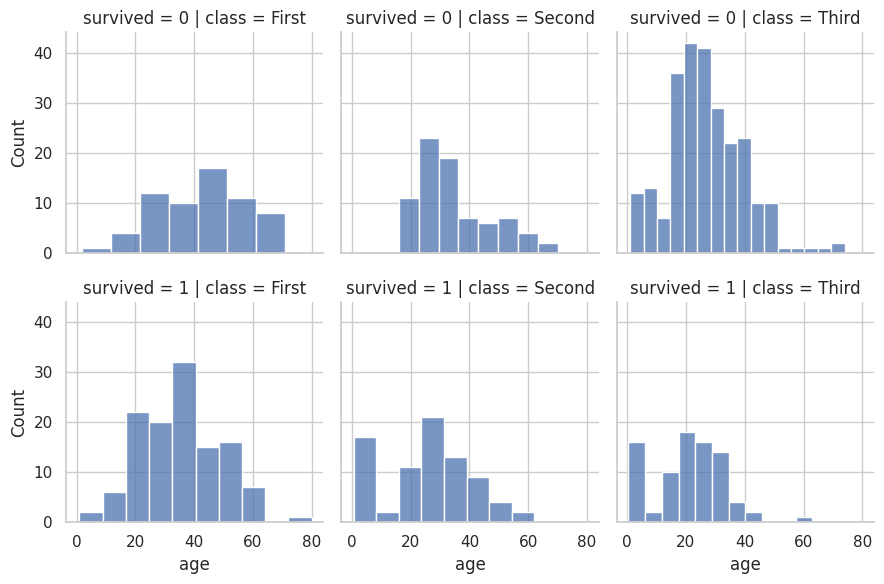

In [ ]:
#Examine the Main Categorical Data
g = sns.FacetGrid(titanic2, row='survived', col='class')
g.map(sns.histplot, "age")
plt.show()

<Axes: xlabel='sibsp', ylabel='count'>

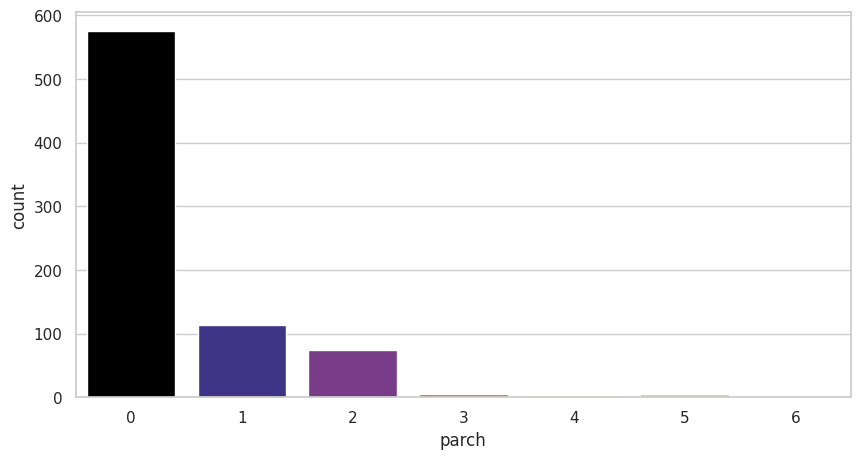

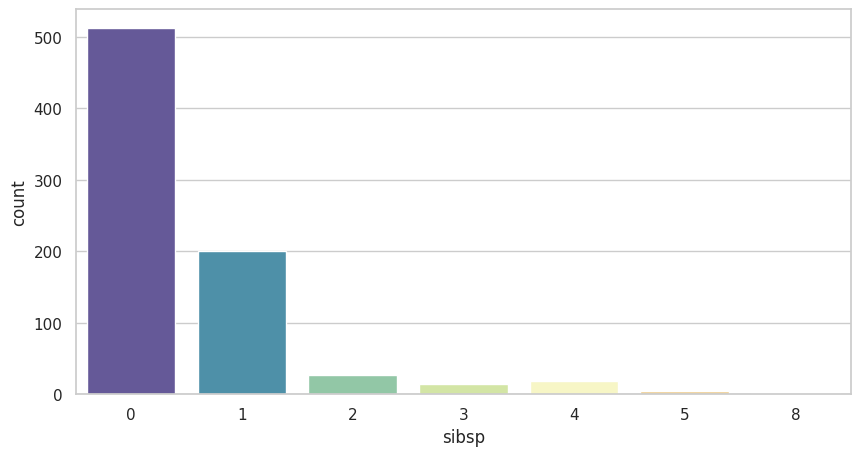

In [ ]:
#Examining Survival vs Aloneness
plt.figure(figsize=(10, 5))
sns.countplot(x='parch', data=titanic2, hue = 'parch', legend = False, palette='CMRmap')

plt.figure(figsize=(10, 5))
sns.countplot(x='sibsp',data=titanic2,  hue = 'sibsp', legend = False, palette='Spectral_r')

Based on the above, most passengers didn't have children, siblings, or spouses on board with them

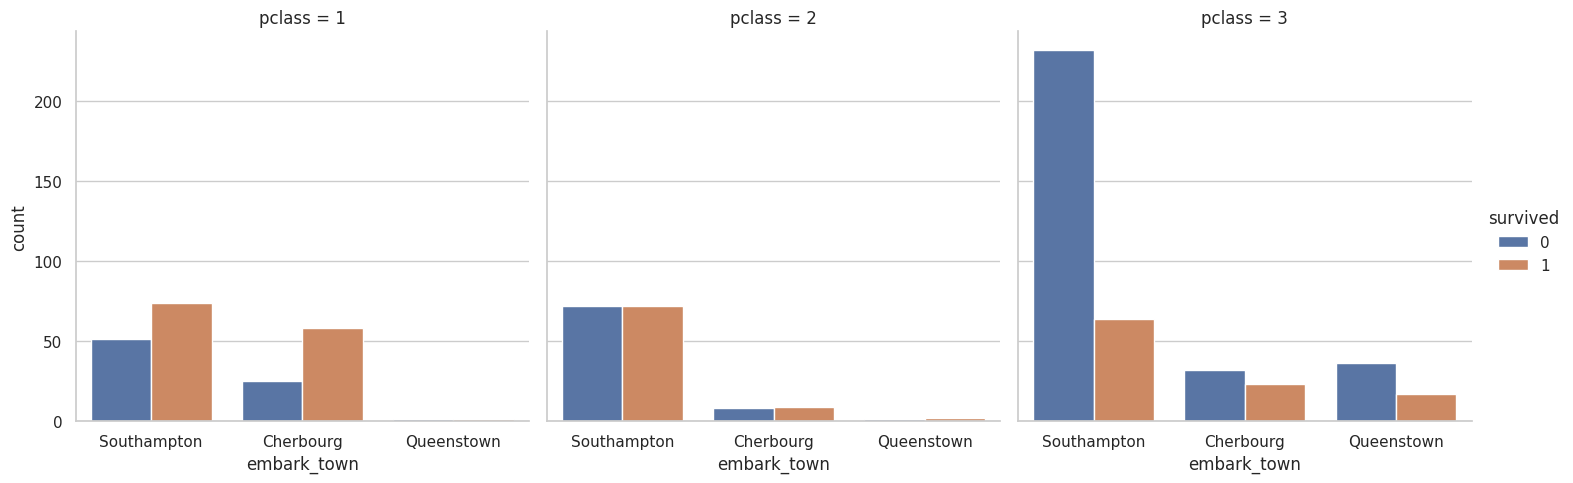

In [ ]:
# Countplot
sns.catplot(x ='embark_town', hue ='survived',
kind ='count', col ='pclass', data = titanic2)

sns.set_theme(style="whitegrid", palette="muted")


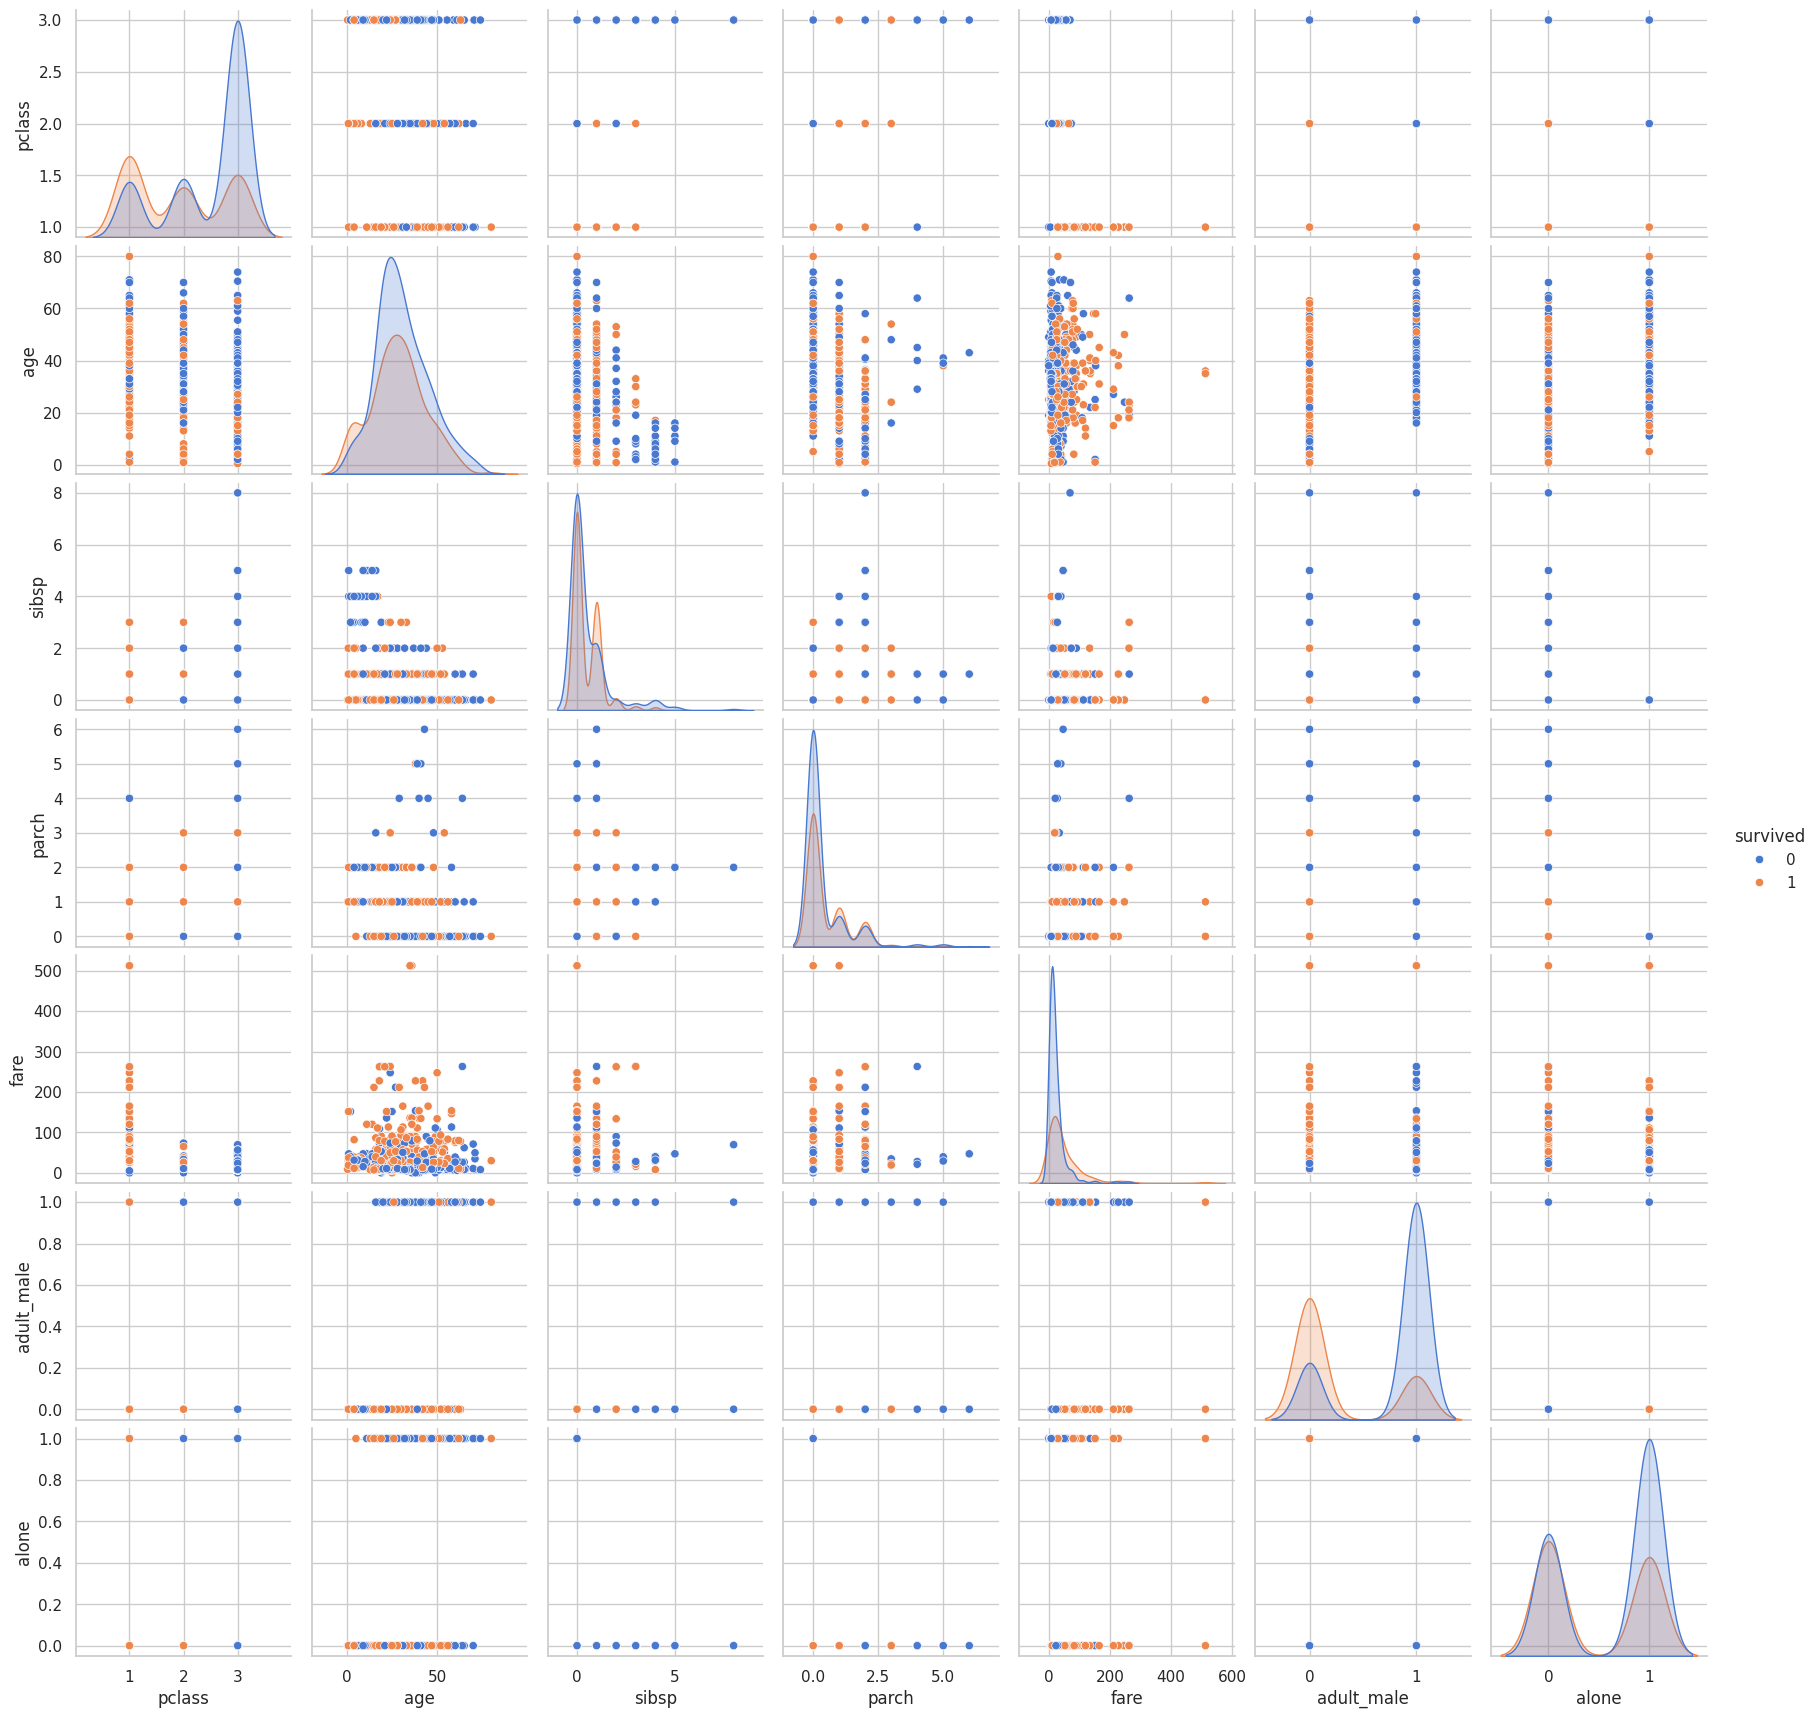

In [ ]:
#Seaborn Pairplot

# Pairplot to visualize relationships between all features at once
sns.pairplot(titanic2, hue='survived')
plt.show()



In [ ]:
#Based on all the graphs, the following columns are redundant or unecessary

column_drops = ['alive', 'embark_town', 'who', 'adult_male', "class"]
titanic2 = titanic2.drop(column_drops, axis=1)

# **Clean the Data**

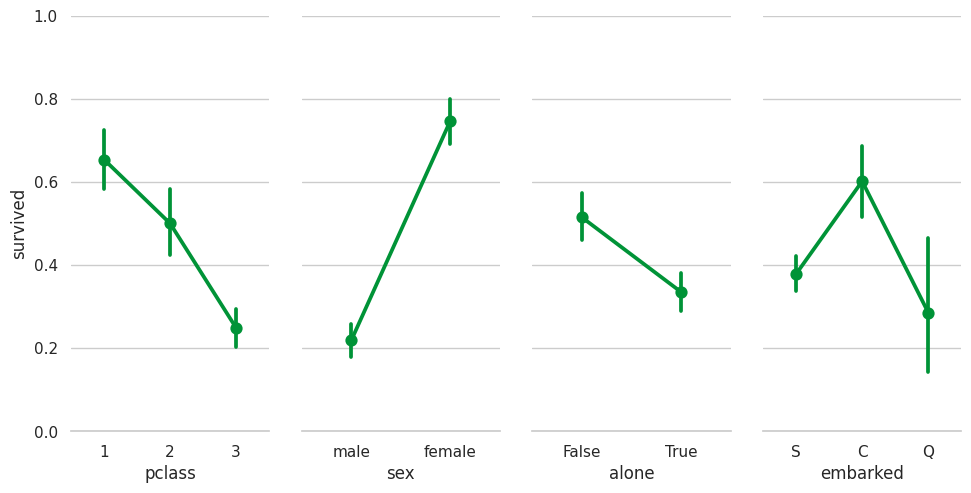

In [ ]:

# Deletion: Remove rows with any missing values
cleaned_titanic = titanic2.dropna()


sns.set_theme(style="whitegrid")


# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(cleaned_titanic, y_vars="survived",
                 x_vars=["pclass", "sex", "alone", "embarked"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color="xkcd:kelley green")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

Rerun Point Plot to see which changed the most

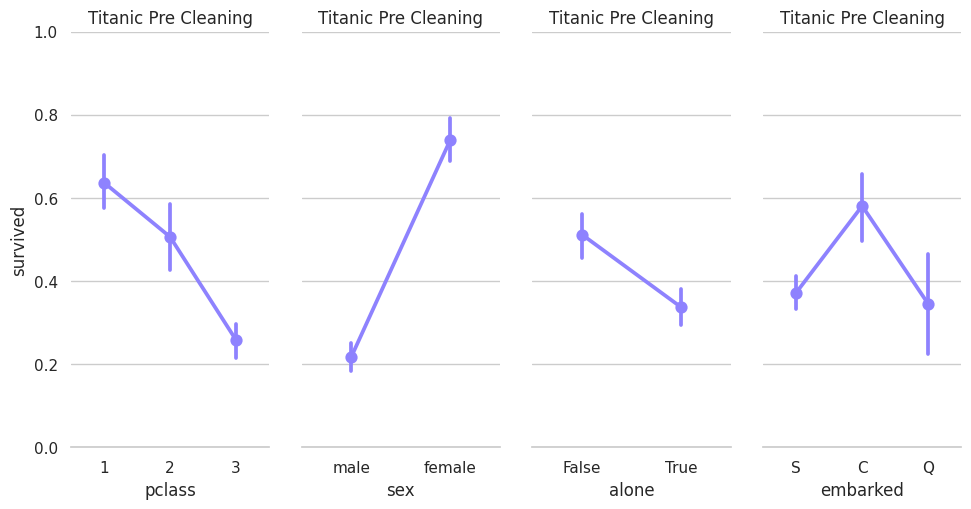

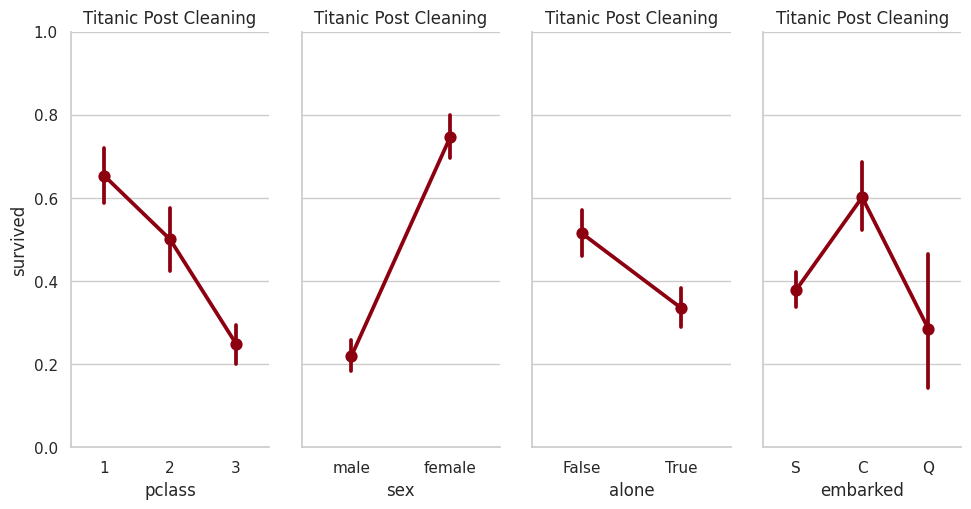

In [ ]:
sns.set_theme(style="whitegrid")


#Grid for  Titanic 2 vs Cleaned

g = sns.PairGrid(titanic2, y_vars="survived",
                 x_vars=["pclass", "sex", "alone", "embarked"],
                 height=5, aspect=.5)

h = sns.PairGrid(cleaned_titanic, y_vars="survived",
                 x_vars=["pclass", "sex", "alone", "embarked"],
                 height=5, aspect=.5)



# Seaborn Point Plot for Titanic 2(g) vs Cleaned(h)
g.map(sns.pointplot, color="xkcd:periwinkle")
g.set(ylim=(0, 1))
g.set(title = "Titanic Pre Cleaning")
sns.despine(fig=g.fig, left=True)


h.map(sns.pointplot, color="xkcd:crimson")
h.set(ylim=(0, 1))
h.set(title = "Titanic Post Cleaning")
sns.despine(fig=g.fig, left=True)


Comparing the Point Plots pre and post cleaning shows there wasn't a drastic change

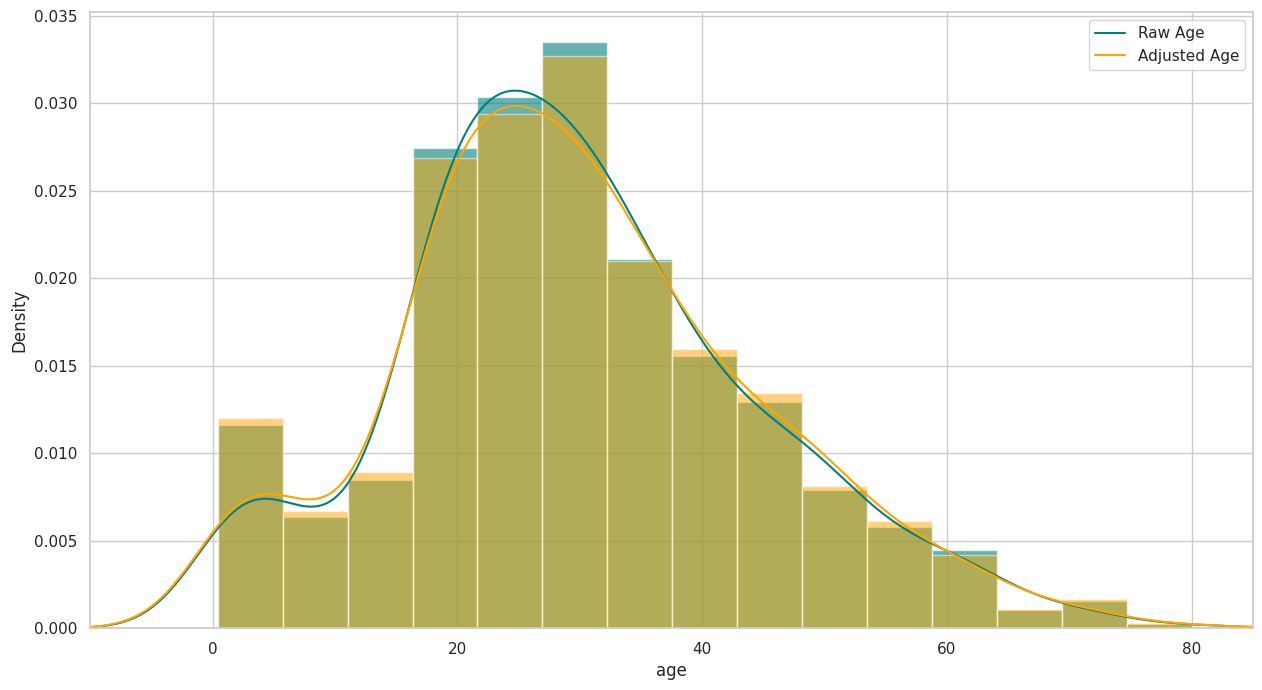

In [ ]:
#Comparing Change in Age
plt.figure(figsize=(15,8))

# Plotting Original Age
ax = titanic["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic["age"].plot(kind='density', color='teal')

# Plotting Post-Cleaning Age
ax = cleaned_titanic["age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
cleaned_titanic["age"].plot(kind='density', color='orange')

ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()


Post Cleaning, the Age Column hasn't changed drastically

In [ ]:
titanic4 = cleaned_titanic

In [ ]:
print(titanic4.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  alone
0         0       3    male  22.0      1      0   7.2500        S  False
1         1       1  female  38.0      1      0  71.2833        C  False
2         1       3  female  26.0      0      0   7.9250        S   True
3         1       1  female  35.0      1      0  53.1000        S  False
4         0       3    male  35.0      0      0   8.0500        S   True


,survived
survived,1.000000
pclass,0.353706
age,0.090309
sibsp,0.034734
parch,0.082956
fare,0.257691
alone,0.181316


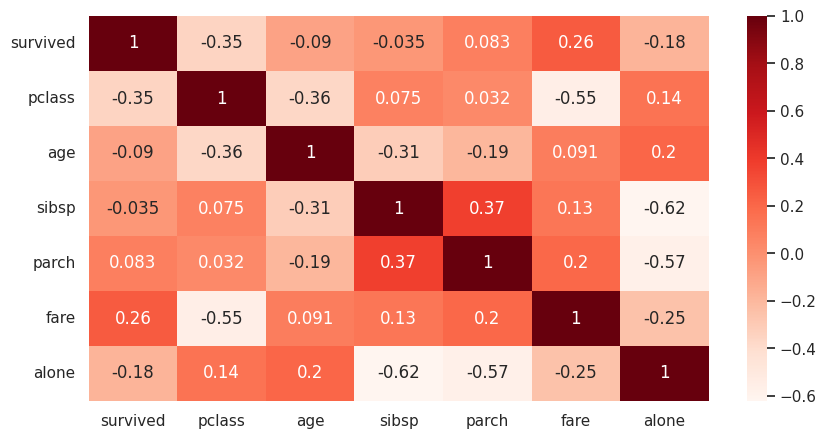

In [ ]:

#Remove Non-Numerical Columns from consideration
titanic_col = titanic4.select_dtypes(exclude=['object', 'category']).columns
titanic_data_col = titanic4[titanic_col]

# Plot a Correlation Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(titanic_data_col.corr(), annot=True, cmap='Reds');
correlation = abs(pd.DataFrame(titanic_data_col.corr().survived))
correlation


Currently, Class, Fare and embarking Alone have the most effect <br>
Sex has been removed as it is not numerical but will be tested again <br>
In the 'Raw Age vs Adjusted Age' graph it was shown that thet age hadn't changed drastically so its relative lack of effect in the Correlation Matrix isn't the fault of cleaning

# **Discretization**

In [ ]:
# Main Demogrpahical Age Categories are: Child, Adult, Senior
# As such, the 'age' column will be binned into those categories

titanic4['age_group'] = pd.cut(titanic4['age'], bins=[0, 18, 65, np.inf], labels=['child', 'adult', 'senior'])
titanic4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,False,adult
1,1,1,female,38.0,1,0,71.2833,C,False,adult
2,1,3,female,26.0,0,0,7.9250,S,True,adult
3,1,1,female,35.0,1,0,53.1000,S,False,adult
4,0,3,male,35.0,0,0,8.0500,S,True,adult


<Axes: xlabel='Family_Size', ylabel='survived'>

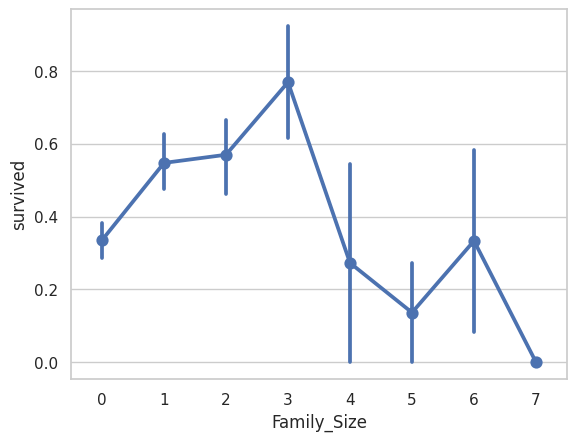

In [ ]:
# Combine 'sibsp' and 'parch' into a new feature
titanic4['family_size'] = titanic4['sibsp'] + titanic4['parch']
titanic4.head()


# Adding a column Family_Size
titanic4['Family_Size'] = 0
titanic4['Family_Size'] = titanic4['parch'] + titanic4['sibsp']


# Pointplot for Family_Size
sns.pointplot(x ='Family_Size', y ='survived', data = titanic4)


<Axes: xlabel='Fare_Range', ylabel='Survived'>

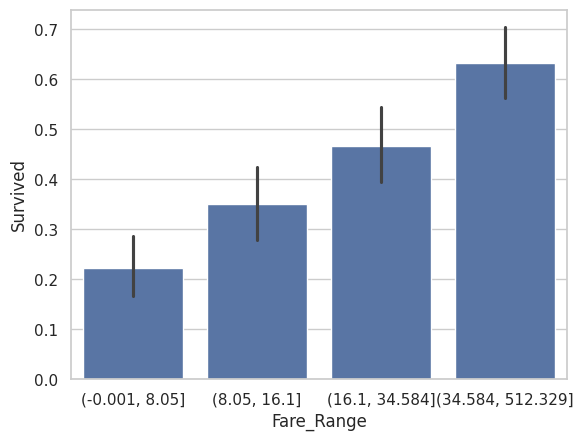

In [ ]:
#BIN FARE AS WELL

# Bin the 'fare' column into  categories
# Determine Bin Ranges using a histogram

# Divide Fare into 4 bins
titanic4['Fare_Range'] = pd.qcut(titanic4['fare'], 4)
titanic4['Survived'] = titanic4['survived']

sns.barplot(x ='Fare_Range', y ='Survived',
data = titanic4)



In [ ]:
#Fare Bins

bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['very low', 'low', 'medium', 'high']
titanic4['fare_group'] = pd.cut(titanic4["fare"], bins = bins, labels = labels)

titanic4.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,age_group,family_size,Family_Size,Fare_Range,Survived,fare_group
0,0,3,male,22.0,1,0,7.2500,S,False,adult,1,1,"(-0.001, 8.05]",0,very low
1,1,1,female,38.0,1,0,71.2833,C,False,adult,1,1,"(34.584, 512.329]",1,high
2,1,3,female,26.0,0,0,7.9250,S,True,adult,0,0,"(-0.001, 8.05]",1,low
3,1,1,female,35.0,1,0,53.1000,S,False,adult,1,1,"(34.584, 512.329]",1,high
4,0,3,male,35.0,0,0,8.0500,S,True,adult,0,0,"(-0.001, 8.05]",0,low


Remove Redundant Columns

In [ ]:
column_drops = ['sibsp', 'parch', 'family_size']
titanic4 = titanic4.drop(column_drops, axis=1)
print(titanic4.head())

   survived  pclass     sex   age     fare embarked  alone age_group  \
0         0       3    male  22.0   7.2500        S  False     adult   
1         1       1  female  38.0  71.2833        C  False     adult   
2         1       3  female  26.0   7.9250        S   True     adult   
3         1       1  female  35.0  53.1000        S  False     adult   
4         0       3    male  35.0   8.0500        S   True     adult   

   Family_Size         Fare_Range  Survived fare_group  
0            1     (-0.001, 8.05]         0   very low  
1            1  (34.584, 512.329]         1       high  
2            0     (-0.001, 8.05]         1        low  
3            1  (34.584, 512.329]         1       high  
4            0     (-0.001, 8.05]         0        low  


# ONE HOT ENCODING


Perform one-hot encoding on the categorical columns: sex, embarked, alone AgeGroup and FareGroup, and ensure the result is in 0s and 1s

In [ ]:
#Sex Column
titanic4 = pd.get_dummies(titanic4, columns=['sex'], drop_first=True, dtype=int)
print(titanic4.head())

   survived  pclass   age     fare embarked  alone age_group  Family_Size  \
0         0       3  22.0   7.2500        S  False     adult            1   
1         1       1  38.0  71.2833        C  False     adult            1   
2         1       3  26.0   7.9250        S   True     adult            0   
3         1       1  35.0  53.1000        S  False     adult            1   
4         0       3  35.0   8.0500        S   True     adult            0   

          Fare_Range  Survived fare_group  sex_male  
0     (-0.001, 8.05]         0   very low         1  
1  (34.584, 512.329]         1       high         0  
2     (-0.001, 8.05]         1        low         0  
3  (34.584, 512.329]         1       high         0  
4     (-0.001, 8.05]         0        low         1  


In [ ]:
#Embarked Column
titanic4 = pd.get_dummies(titanic4, columns=['embarked'], drop_first=True, dtype=int)
print(titanic4.head())

   survived  pclass   age     fare  alone age_group  Family_Size  \
0         0       3  22.0   7.2500  False     adult            1   
1         1       1  38.0  71.2833  False     adult            1   
2         1       3  26.0   7.9250   True     adult            0   
3         1       1  35.0  53.1000  False     adult            1   
4         0       3  35.0   8.0500   True     adult            0   

          Fare_Range  Survived fare_group  sex_male  embarked_Q  embarked_S  
0     (-0.001, 8.05]         0   very low         1           0           1  
1  (34.584, 512.329]         1       high         0           0           0  
2     (-0.001, 8.05]         1        low         0           0           1  
3  (34.584, 512.329]         1       high         0           0           1  
4     (-0.001, 8.05]         0        low         1           0           1  


In [ ]:
#Alone Column
titanic4 = pd.get_dummies(titanic4, columns=['alone'], drop_first=True, dtype=int)
print(titanic4.head())

   survived  pclass   age     fare age_group  Family_Size         Fare_Range  \
0         0       3  22.0   7.2500     adult            1     (-0.001, 8.05]   
1         1       1  38.0  71.2833     adult            1  (34.584, 512.329]   
2         1       3  26.0   7.9250     adult            0     (-0.001, 8.05]   
3         1       1  35.0  53.1000     adult            1  (34.584, 512.329]   
4         0       3  35.0   8.0500     adult            0     (-0.001, 8.05]   

   Survived fare_group  sex_male  embarked_Q  embarked_S  alone_True  
0         0   very low         1           0           1           0  
1         1       high         0           0           0           0  
2         1        low         0           0           1           1  
3         1       high         0           0           1           0  
4         0        low         1           0           1           1  


In [ ]:
# AgeGroup Column
titanic4 = pd.get_dummies(titanic4, columns=['age_group'], drop_first=True, dtype=int)
print(titanic4.head())

   survived  pclass   age     fare  Family_Size         Fare_Range  Survived  \
0         0       3  22.0   7.2500            1     (-0.001, 8.05]         0   
1         1       1  38.0  71.2833            1  (34.584, 512.329]         1   
2         1       3  26.0   7.9250            0     (-0.001, 8.05]         1   
3         1       1  35.0  53.1000            1  (34.584, 512.329]         1   
4         0       3  35.0   8.0500            0     (-0.001, 8.05]         0   

  fare_group  sex_male  embarked_Q  embarked_S  alone_True  age_group_adult  \
0   very low         1           0           1           0                1   
1       high         0           0           0           0                1   
2        low         0           0           1           1                1   
3       high         0           0           1           0                1   
4        low         1           0           1           1                1   

   age_group_senior  
0                 0  


In [ ]:
# PClass Column
titanic4 = pd.get_dummies(titanic4, columns=['pclass'], drop_first=True, dtype=int)
print(titanic4.head())

   survived   age     fare  Family_Size         Fare_Range  Survived  \
0         0  22.0   7.2500            1     (-0.001, 8.05]         0   
1         1  38.0  71.2833            1  (34.584, 512.329]         1   
2         1  26.0   7.9250            0     (-0.001, 8.05]         1   
3         1  35.0  53.1000            1  (34.584, 512.329]         1   
4         0  35.0   8.0500            0     (-0.001, 8.05]         0   

  fare_group  sex_male  embarked_Q  embarked_S  alone_True  age_group_adult  \
0   very low         1           0           1           0                1   
1       high         0           0           0           0                1   
2        low         0           0           1           1                1   
3       high         0           0           1           0                1   
4        low         1           0           1           1                1   

   age_group_senior  pclass_2  pclass_3  
0                 0         0         1  
1       

In [ ]:
# FareGroup Column

titanic4 = pd.get_dummies(titanic4, columns=['fare_group'], drop_first=True, dtype=int)
print(titanic4.head())

   survived   age     fare  Family_Size         Fare_Range  Survived  \
0         0  22.0   7.2500            1     (-0.001, 8.05]         0   
1         1  38.0  71.2833            1  (34.584, 512.329]         1   
2         1  26.0   7.9250            0     (-0.001, 8.05]         1   
3         1  35.0  53.1000            1  (34.584, 512.329]         1   
4         0  35.0   8.0500            0     (-0.001, 8.05]         0   

   sex_male  embarked_Q  embarked_S  alone_True  age_group_adult  \
0         1           0           1           0                1   
1         0           0           0           0                1   
2         0           0           1           1                1   
3         0           0           1           0                1   
4         1           0           1           1                1   

   age_group_senior  pclass_2  pclass_3  fare_group_low  fare_group_medium  \
0                 0         0         1               0                  0   
1 

In [ ]:
print(titanic4.head())

   survived   age     fare  Family_Size         Fare_Range  Survived  \
0         0  22.0   7.2500            1     (-0.001, 8.05]         0   
1         1  38.0  71.2833            1  (34.584, 512.329]         1   
2         1  26.0   7.9250            0     (-0.001, 8.05]         1   
3         1  35.0  53.1000            1  (34.584, 512.329]         1   
4         0  35.0   8.0500            0     (-0.001, 8.05]         0   

   sex_male  embarked_Q  embarked_S  alone_True  age_group_adult  \
0         1           0           1           0                1   
1         0           0           0           0                1   
2         0           0           1           1                1   
3         0           0           1           0                1   
4         1           0           1           1                1   

   age_group_senior  pclass_2  pclass_3  fare_group_low  fare_group_medium  \
0                 0         0         1               0                  0   
1 

# **SCALING**

Remove Redundant Columns

In [ ]:
column_drops = ['survived', 'Fare_Range']
titanic5 = titanic4.drop(column_drops, axis=1)
print(titanic5.head())

    age     fare  Family_Size  Survived  sex_male  embarked_Q  embarked_S  \
0  22.0   7.2500            1         0         1           0           1   
1  38.0  71.2833            1         1         0           0           0   
2  26.0   7.9250            0         1         0           0           1   
3  35.0  53.1000            1         1         0           0           1   
4  35.0   8.0500            0         0         1           0           1   

   alone_True  age_group_adult  age_group_senior  pclass_2  pclass_3  \
0           0                1                 0         0         1   
1           0                1                 0         0         0   
2           1                1                 0         0         1   
3           0                1                 0         0         0   
4           1                1                 0         0         1   

   fare_group_low  fare_group_medium  fare_group_high  
0               0                  0            

Age, Fare and Family Size columns will now be scaled

For Fare and Age columns, there are outliers so Min-Max-Scaling is used. Family Group columns doesn't have too many outliers so Standard Scaler is used here

    age      fare  Family_Size  Survived  sex_male  embarked_Q  embarked_S  \
0  22.0  0.014151            1         0         1           0           1   
1  38.0  0.139136            1         1         0           0           0   
2  26.0  0.015469            0         1         0           0           1   
3  35.0  0.103644            1         1         0           0           1   
4  35.0  0.015713            0         0         1           0           1   

   alone_True  age_group_adult  age_group_senior  pclass_2  pclass_3  \
0           0                1                 0         0         1   
1           0                1                 0         0         0   
2           1                1                 0         0         1   
3           0                1                 0         0         0   
4           1                1                 0         0         1   

   fare_group_low  fare_group_medium  fare_group_high  
0               0                  0      

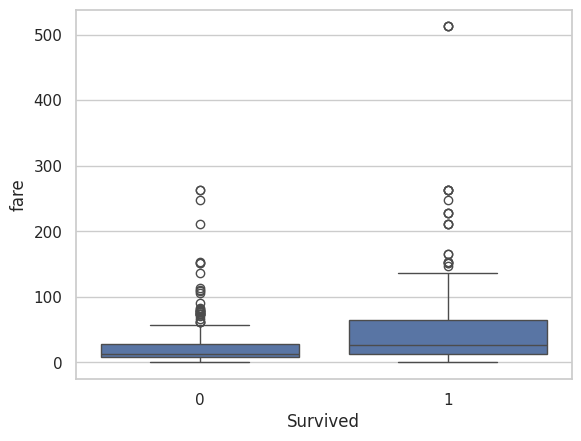

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sns.boxplot(x='Survived', y = 'fare', data=titanic5)
mmScaler = MinMaxScaler()
titanic5['fare'] = mmScaler.fit_transform(np.reshape(titanic5['fare'], (-1,1)))


print(titanic5.head())


        age      fare  Family_Size  Survived  sex_male  embarked_Q  \
0  0.271174  0.014151            1         0         1           0   
1  0.472229  0.139136            1         1         0           0   
2  0.321438  0.015469            0         1         0           0   
3  0.434531  0.103644            1         1         0           0   
4  0.434531  0.015713            0         0         1           0   

   embarked_S  alone_True  age_group_adult  age_group_senior  pclass_2  \
0           1           0                1                 0         0   
1           0           0                1                 0         0   
2           1           1                1                 0         0   
3           1           0                1                 0         0   
4           1           1                1                 0         0   

   pclass_3  fare_group_low  fare_group_medium  fare_group_high  
0         1               0                  0                0  
1 

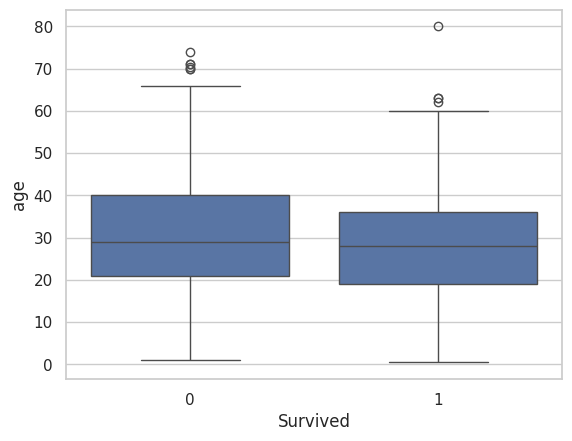

In [ ]:

sns.boxplot(x='Survived', y = 'age', data=titanic5)

mmScaler = MinMaxScaler()
titanic5['age'] = mmScaler.fit_transform(np.reshape(titanic5['age'], (-1,1)))
print(titanic5.head())

        age      fare  Family_Size  Survived  sex_male  embarked_Q  \
0  0.271174  0.014151     0.004922         0         1           0   
1  0.472229  0.139136     0.004922         1         0           0   
2  0.321438  0.015469    -0.658588         1         0           0   
3  0.434531  0.103644     0.004922         1         0           0   
4  0.434531  0.015713    -0.658588         0         1           0   

   embarked_S  alone_True  age_group_adult  age_group_senior  pclass_2  \
0           1           0                1                 0         0   
1           0           0                1                 0         0   
2           1           1                1                 0         0   
3           1           0                1                 0         0   
4           1           1                1                 0         0   

   pclass_3  fare_group_low  fare_group_medium  fare_group_high  
0         1               0                  0                0  
1 

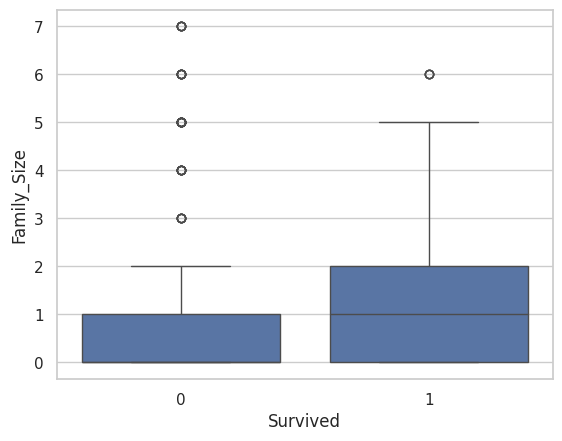

In [ ]:
from sklearn.preprocessing import StandardScaler

sns.boxplot(x='Survived', y = 'Family_Size', data=titanic5)

stScaler = StandardScaler()
titanic5['Family_Size'] = stScaler.fit_transform(np.reshape(titanic5['Family_Size'], (-1,1)))

print(titanic5.head())


In [ ]:
titanic5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                674 non-null    float64
 1   fare               674 non-null    float64
 2   Family_Size        674 non-null    float64
 3   Survived           674 non-null    int64  
 4   sex_male           674 non-null    int64  
 5   embarked_Q         674 non-null    int64  
 6   embarked_S         674 non-null    int64  
 7   alone_True         674 non-null    int64  
 8   age_group_adult    674 non-null    int64  
 9   age_group_senior   674 non-null    int64  
 10  pclass_2           674 non-null    int64  
 11  pclass_3           674 non-null    int64  
 12  fare_group_low     674 non-null    int64  
 13  fare_group_medium  674 non-null    int64  
 14  fare_group_high    674 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 84.2 KB


Now the Code has been fully prepped

# **Classification**

In [ ]:
# Logistic Regression Code

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = titanic5.drop('Survived', axis = 1)
y = titanic5['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# X contains independent values, y contains dependent value

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(451, 14)
(223, 14)
(451,)
(223,)


In [ ]:
#The Model

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1])

## Classification Report

In [ ]:

# Accuracy:
from sklearn.metrics import accuracy_score
print('Accuracy of the Titanic Logistic Regression model is  :')
print(accuracy_score(y_test, y_pred))


# Precision:
from sklearn.metrics import precision_score
print('Precision of the Titanic Logistic Regression model is  :')
print(precision_score(y_test, y_pred))


# Recall:
from sklearn.metrics import recall_score
print('Recall of the Titanic Logistic Regression model is  :')
print(recall_score(y_test, y_pred))


# F1 score
from sklearn.metrics import f1_score
print('F1 Score of the Titanic Logistic Regression model is  :')
print(f1_score(y_test, y_pred))

#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of the Titanic Logistic Regression model is  :
0.8340807174887892
Precision of the Titanic Logistic Regression model is  :
0.9154929577464789
Recall of the Titanic Logistic Regression model is  :
0.6770833333333334
F1 Score of the Titanic Logistic Regression model is  :
0.7784431137724551
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       127
           1       0.92      0.68      0.78        96

    accuracy                           0.83       223
   macro avg       0.86      0.81      0.82       223
weighted avg       0.85      0.83      0.83       223



In [ ]:
# Confusion Matrix:

from sklearn.metrics import confusion_matrix
print('The Confusion Matrix of the Titanic Logistic Regression model is  :')
confusion_matrix(y_pred, y_test)

The Confusion Matrix of the Titanic Logistic Regression model is  :


array([[121,  31],
       [  6,  65]])

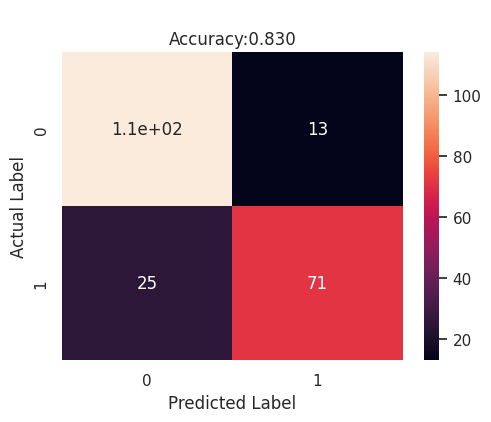

In [ ]:
#Visualize Confusion Matrix

from sklearn.svm import SVC


clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('\nAccuracy:{0:.3f}'.format((accuracy_score(y_test, y_pred))))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
